
---

**Global Happiness Dashboard**

**Author:** Ruby Poddar

**Objective:**
The project aims to analyze global happiness scores using various data visualization techniques and statistical tests. The goal is to gain insights into factors influencing happiness across different countries.

**Tools and Libraries Used:**
- **Python:** Programming language used for data manipulation, analysis, and visualization.
- **Pandas:** Library for data manipulation and analysis in Python.
- **Matplotlib:** Library for creating static, animated, and interactive visualizations in Python.
- **Seaborn:** Statistical data visualization library based on Matplotlib.
- **Plotly:** Library for interactive, web-based visualization.
- **Dash:** Framework for building analytical web applications.

**Steps Covered:**

1. **Data Loading and Preparation:**
   - Loaded the dataset containing global happiness scores.
   - Checked for missing values and handled them as necessary.
   - Converted data types to ensure consistency and accuracy.

2. **Exploratory Data Analysis (EDA):**
   - Conducted summary statistics to understand the distribution of happiness scores.
   - Visualized data using histograms, scatter plots, and correlation matrices to explore relationships between variables.

3. **Feature Engineering:**
   - Created new features based on existing data to derive additional insights.

4. **Data Visualization:**
   - Utilized Matplotlib and Seaborn to visualize relationships and distributions in the data.
   - Generated scatter plot matrices and heatmaps to analyze correlations between variables.

5. **Statistical Analysis:**
   - Performed statistical tests such as ANOVA to examine significant differences between groups of data.

6. **Dashboard Creation:**
   - Used Dash and Plotly to create an interactive web-based dashboard.
   - Designed the dashboard to display key visualizations dynamically, allowing users to explore data interactively.

**Conclusion:**
Through this project, we gained valuable insights into global happiness trends and factors influencing happiness scores across countries. The combination of data exploration, visualization techniques, and statistical analysis provided a comprehensive understanding of the dataset. The interactive dashboard created using Dash and Plotly enables users to explore and interpret the data effectively.

**Future Recommendations:**
- Expand the dataset to include more years or additional factors influencing happiness.
- Implement machine learning models for predictive analysis of happiness scores.
- Enhance the dashboard with more interactive features and real-time data updates for ongoing analysis.

This project exemplifies the use of Python-based data science tools to derive meaningful insights from complex datasets and communicate findings effectively through visualization and interactive dashboards.

---

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os


In [3]:
data = pd.read_csv(r"C:\Users\Abhishek Kumar\OneDrive\Desktop\World Happiness Day\WHR2024\WHR2024.csv")

In [23]:
data.shape

(143, 11)

In [24]:
data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [25]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [26]:
data.describe(include='object')

,Country name
count,143
unique,143
top,Finland
freq,1


In [27]:
data.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

In [28]:
data.dtypes

Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

In [29]:
for column in data.columns:
    print("{column}: {data[column].nunique()} unique values")

{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values
{column}: {data[column].nunique()} unique values


In [32]:
numeric_columns = data.select_dtypes(include=[np.number])
numeric_columns

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...
138,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [34]:
correlation_matrix = numeric_columns.corr()


In [35]:
correlation_matrix

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.999678,0.999697,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829,0.533542
upperwhisker,0.999678,1.000000,0.998750,0.761804,0.811550,0.751042,0.646309,0.129602,0.448847,0.542267
lowerwhisker,0.999697,0.998750,1.000000,0.774531,0.814992,0.767506,0.642291,0.130446,0.454480,0.524816
Explained by: Log GDP per capita,0.768504,0.761804,0.774531,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227,-0.029118
Explained by: Social support,0.813542,0.811550,0.814992,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870,0.159484
Explained by: Healthy life expectancy,0.759659,0.751042,0.767506,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026,0.051538
Explained by: Freedom to make life choices,0.644451,0.646309,0.642291,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197,0.250792
Explained by: Generosity,0.130038,0.129602,0.130446,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666,0.036423
Explained by: Perceptions of corruption,0.451829,0.448847,0.454480,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000,0.000964
Dystopia + residual,0.533542,0.542267,0.524816,-0.029118,0.159484,0.051538,0.250792,0.036423,0.000964,1.000000


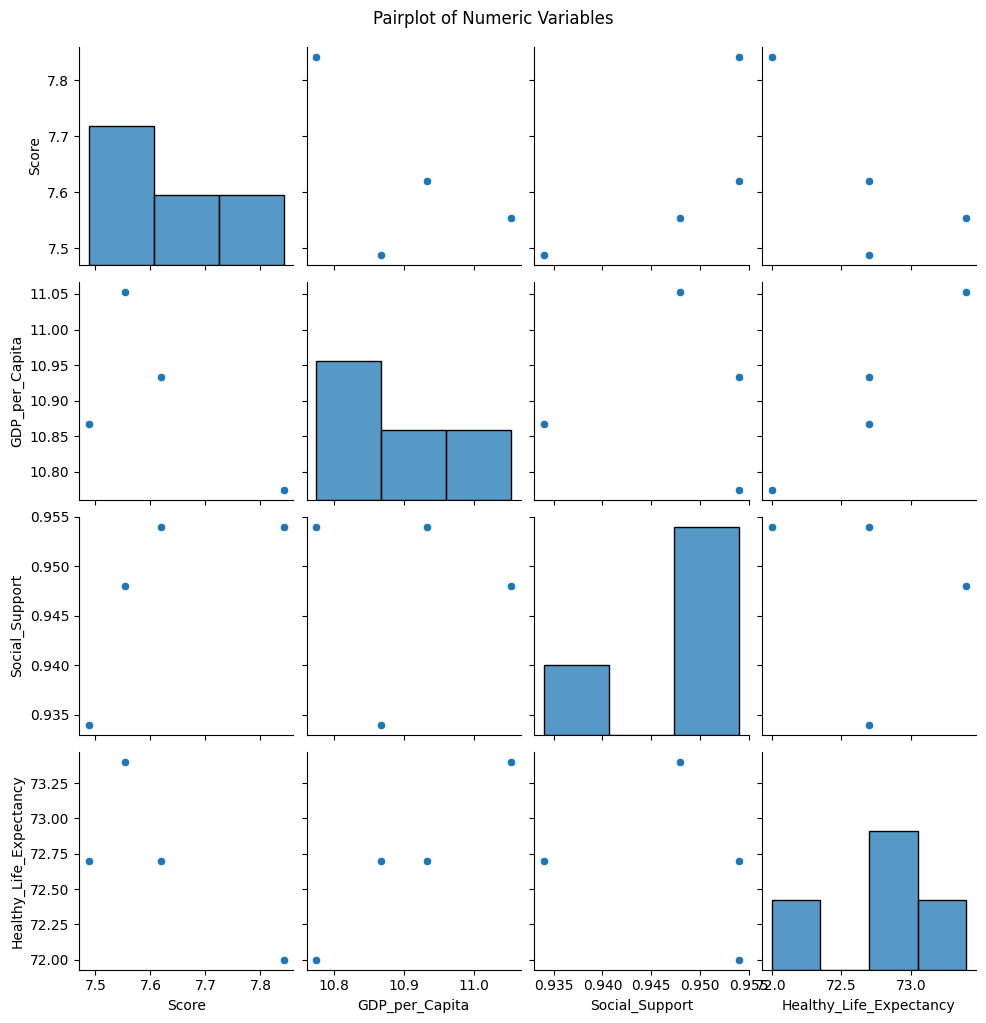

In [46]:
sns.pairplot(data[['Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


In [47]:
missing_values = data.isnull().sum()
missing_values

Country                    0
Score                      0
GDP_per_Capita             0
Social_Support             0
Healthy_Life_Expectancy    0
dtype: int64

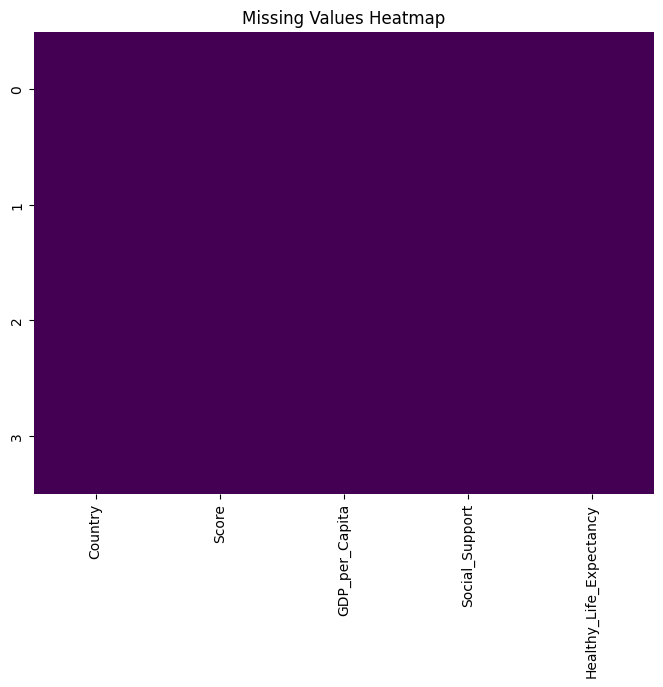

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [49]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape[0]

0

In [50]:
data.drop_duplicates(inplace=True)

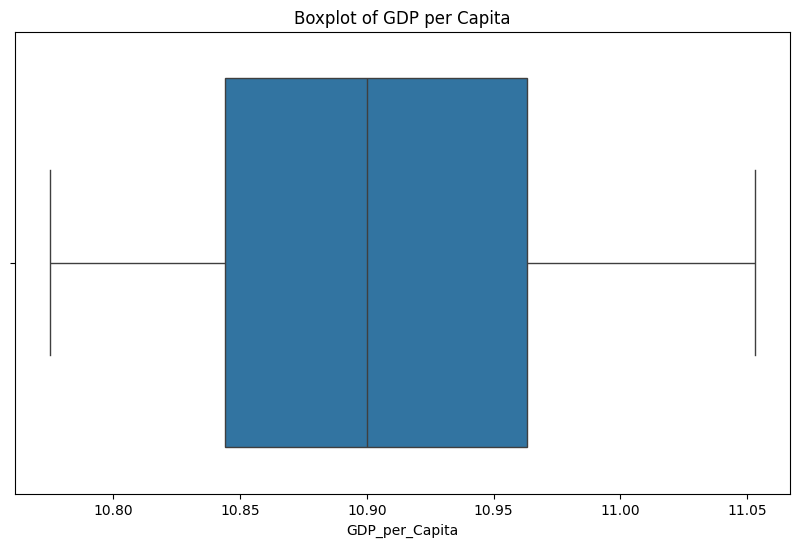

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP_per_Capita', data=data)
plt.title('Boxplot of GDP per Capita')
plt.show()

In [52]:
q1 = data['GDP_per_Capita'].quantile(0.25)
q3 = data['GDP_per_Capita'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [53]:
data['GDP_per_Capita'] = data['GDP_per_Capita'].clip(lower=lower_bound, upper=upper_bound)

In [54]:
mean_value = data['GDP_per_Capita'].mean()
data['GDP_per_Capita'].fillna(mean_value, inplace=True)

In [55]:
data.fillna(method='ffill', inplace=True)

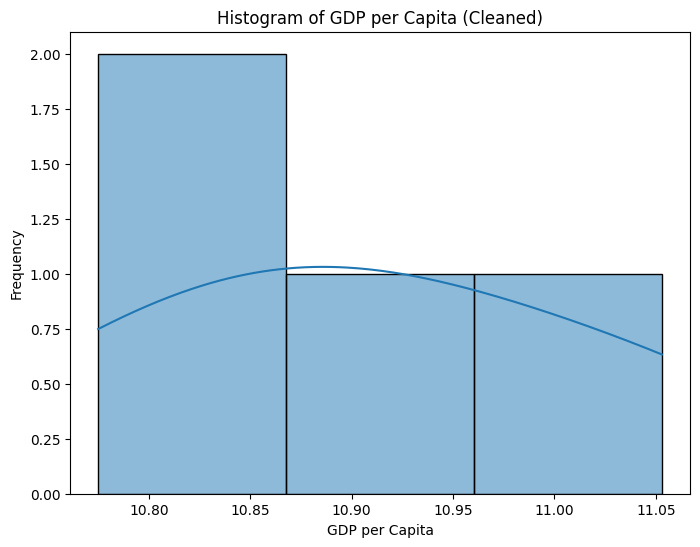

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data['GDP_per_Capita'], kde=True)
plt.title('Histogram of GDP per Capita (Cleaned)')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

In [58]:
print(data.columns)


Index(['Country', 'Score', 'GDP_per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy'],
      dtype='object')


In [62]:
data.head(10)

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [65]:
usecols=(['Country', 'Year', 'Score', ...])

In [67]:
data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [86]:
data.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [87]:
data.iloc[:, 0]

0               Finland
1               Denmark
2               Iceland
3                Sweden
4                Israel
             ...       
138    Congo (Kinshasa)
139        Sierra Leone
140             Lesotho
141             Lebanon
142         Afghanistan
Name: Country name, Length: 143, dtype: object

In [88]:
data.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

In [89]:
data['Ladder score'] = pd.to_numeric(data['Ladder score'], errors='coerce')

In [90]:
data['Total Score'] = data['Ladder score'] + data['Dystopia + residual']


In [91]:
average_score_by_country = data.groupby('Country name')['Ladder score'].mean().reset_index()

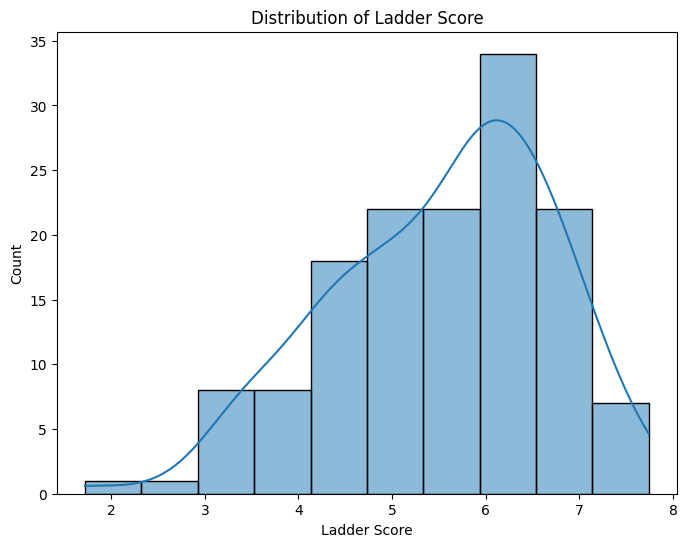

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Ladder score'], kde=True)
plt.title('Distribution of Ladder Score')
plt.xlabel('Ladder Score')
plt.show()

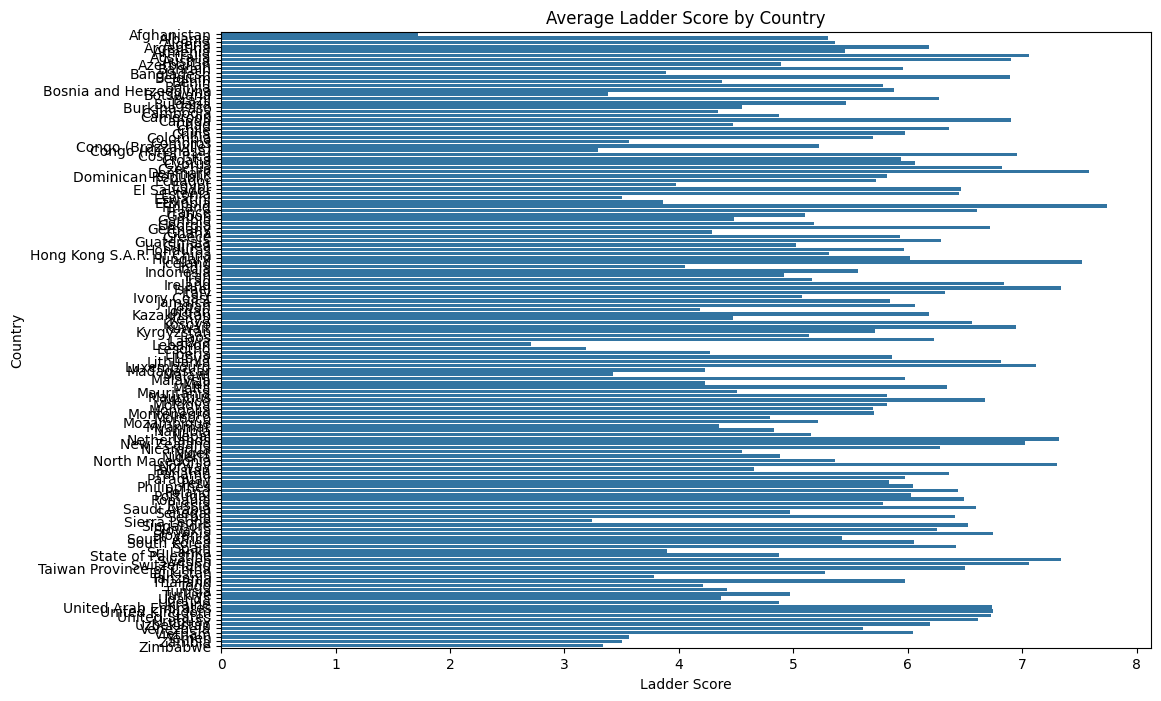

In [93]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Ladder score', y='Country name', data=average_score_by_country)
plt.title('Average Ladder Score by Country')
plt.xlabel('Ladder Score')
plt.ylabel('Country')
plt.show()

In [94]:
data.to_csv('transformed_data.csv', index=False)


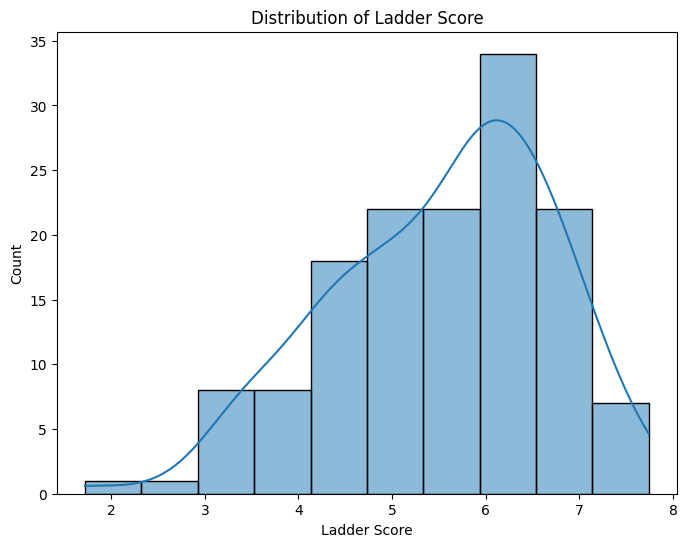

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Ladder score'], kde=True)
plt.title('Distribution of Ladder Score')
plt.xlabel('Ladder Score')
plt.savefig('ladder_score_distribution.png')

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [111]:
data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Total Score'],
      dtype='object')

In [112]:
numeric_cols = ['Ladder score', 'Explained by: Log GDP per capita',
                'Explained by: Social support', 'Explained by: Healthy life expectancy',
                'Explained by: Freedom to make life choices', 'Explained by: Generosity',
                'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Total Score']


In [115]:
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(data[numeric_cols])
normalized_data

array([[1.        , 0.86127978, 0.97217069, ..., 0.94956522, 0.70172582,
        1.        ],
       [0.97375415, 0.89117235, 0.94001237, ..., 0.95304348, 0.63627483,
        0.95168237],
       [0.9641196 , 0.87856142, 1.        , ..., 0.31652174, 0.69130576,
        0.9666218 ],
       ...,
       [0.24335548, 0.3601121 , 0.52628324, ..., 0.14782609, 0.30869424,
        0.22449529],
       [0.16378738, 0.6431574 , 0.35683364, ..., 0.05043478, 0.        ,
        0.03243607],
       [0.        , 0.29332088, 0.        , ..., 0.15304348, 0.24259199,
        0.        ]])

In [118]:
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(data[numeric_cols])
standardized_data

array([[ 1.89729932,  1.09824759,  1.31779296, ...,  3.11542572,
         0.94500859,  1.77381317],
       [ 1.76186486,  1.24934158,  1.1612252 , ...,  3.13132568,
         0.56968338,  1.53936777],
       [ 1.71214841,  1.1855988 ,  1.45328428, ...,  0.22163401,
         0.88525532,  1.61185646],
       ...,
       [-2.00715625, -1.43493762, -0.85307921, ..., -0.54951378,
        -1.30880995, -1.98906819],
       [-2.41774554, -0.00426638, -1.67807085, ..., -0.99471251,
        -3.07900048, -2.92097234],
       [-3.26292516, -1.77253825, -3.41537076, ..., -0.52566385,
        -1.68786974, -3.0783577 ]])

In [119]:
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)
standardized_df = pd.DataFrame(standardized_data, columns=numeric_cols)


In [120]:
normalized_df['Country name'] = data['Country name']
standardized_df['Country name'] = data['Country name']

In [121]:
normalized_df.head()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Total Score,Country name
0,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726,1.000000,Finland
1,0.973754,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275,0.951682,Denmark
2,0.964120,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306,0.966622,Iceland
3,0.934053,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660,0.889502,Sweden
4,0.933555,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061,0.975236,Israel


In [122]:
standardized_df.head()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Total Score,Country name
0,1.897299,1.098248,1.317793,1.059525,1.472287,-0.058370,3.115426,0.945009,1.773813,Finland
1,1.761865,1.249342,1.161225,1.083865,1.249941,0.788873,3.131326,0.569683,1.539368,Denmark
2,1.712148,1.185599,1.453284,1.199485,1.225236,1.526794,0.221634,0.885255,1.611856,Iceland
3,1.556999,1.178516,1.104018,1.235996,1.342585,1.021182,2.940526,0.153278,1.237658,Sweden
4,1.554427,1.001453,1.140149,1.333360,0.125863,0.091947,0.309084,1.348343,1.653652,Israel


In [124]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
encoder = OneHotEncoder()

In [127]:
encoded_country = encoder.fit_transform(data[['Country name']])
encoded_country

<143x143 sparse matrix of type '<class 'numpy.float64'>'
	with 143 stored elements in Compressed Sparse Row format>

In [129]:
feature_names = encoder.get_feature_names_out(['Country name'])
feature_names

array(['Country name_Afghanistan', 'Country name_Albania',
       'Country name_Algeria', 'Country name_Argentina',
       'Country name_Armenia', 'Country name_Australia',
       'Country name_Austria', 'Country name_Azerbaijan',
       'Country name_Bahrain', 'Country name_Bangladesh',
       'Country name_Belgium', 'Country name_Benin',
       'Country name_Bolivia', 'Country name_Bosnia and Herzegovina',
       'Country name_Botswana', 'Country name_Brazil',
       'Country name_Bulgaria', 'Country name_Burkina Faso',
       'Country name_Cambodia', 'Country name_Cameroon',
       'Country name_Canada', 'Country name_Chad', 'Country name_Chile',
       'Country name_China', 'Country name_Colombia',
       'Country name_Comoros', 'Country name_Congo (Brazzaville)',
       'Country name_Congo (Kinshasa)', 'Country name_Costa Rica',
       'Country name_Croatia', 'Country name_Cyprus',
       'Country name_Czechia', 'Country name_Denmark',
       'Country name_Dominican Republic', 'Co

In [131]:
encoded_country_df = pd.DataFrame(encoded_country.toarray(), columns=feature_names)
encoded_country_df

,Country name_Afghanistan,Country name_Albania,Country name_Algeria,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,...,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
encoded_df = pd.concat([encoded_country_df, data.drop(columns=['Country name'])], axis=1)
encoded_df

,Country name_Afghanistan,Country name_Albania,Country name_Algeria,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,...,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Total Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,9.823
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,9.464
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,9.575
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,9.002
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,9.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,4.397
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,4.313
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,4.061
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,2.634


In [133]:
encoded_df.head()

,Country name_Afghanistan,Country name_Albania,Country name_Algeria,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,...,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Total Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,9.823
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,9.464
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,9.575
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,9.002
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,9.639


In [135]:
encoded_df.columns


Index(['Country name_Afghanistan', 'Country name_Albania',
       'Country name_Algeria', 'Country name_Argentina',
       'Country name_Armenia', 'Country name_Australia',
       'Country name_Austria', 'Country name_Azerbaijan',
       'Country name_Bahrain', 'Country name_Bangladesh',
       ...
       'upperwhisker', 'lowerwhisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Total Score'],
      dtype='object', length=154)

In [137]:
fig = px.scatter(encoded_df, x='Explained by: Log GDP per capita', y='Ladder score', color='Country name_Afghanistan', hover_name='Country name_Afghanistan',
                 title='Ladder Score vs. GDP per Capita (Encoded)',
                 labels={'Explained by: Log GDP per capita': 'GDP per Capita', 'Ladder score': 'Ladder Score'})
fig.show()


In [143]:
data = pd.DataFrame({
    'Country name': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Ladder score': [6.5, 7.2, 5.8, 6.9, 7.5],
    'Region': ['Region 1', 'Region 2', 'Region 1', 'Region 3', 'Region 2']
})

In [144]:
mean_score_by_region = data.groupby('Region')['Ladder score'].mean().reset_index()

In [146]:
fig = px.bar(mean_score_by_region, x='Region', y='Ladder score', color='Region',
             title='Average Ladder Score by Region',
             labels={'Ladder score': 'Average Ladder Score', 'Region': 'Region'})
fig.show()


In [148]:
# Box plot
fig = px.box(data, x='Region', y='Ladder score', color='Region',
             title='Ladder Score Distribution by Region',
             labels={'Ladder score': 'Ladder Score', 'Region': 'Region'})
fig.show()


In [151]:
data = pd.DataFrame({
    'Country name': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Explained by: Social support': [0.9, 0.8, 0.7, 0.6, 0.9],
    'Explained by: Healthy life expectancy': [0.85, 0.78, 0.65, 0.72, 0.88],
    'Explained by: Freedom to make life choices': [0.82, 0.79, 0.68, 0.75, 0.91],
})
fig = px.line(data, x='Country name', y=['Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices'],
              title='Explained Factors over Countries',
              labels={'value': 'Explained Factor', 'Country name': 'Country'})
fig.show()

In [162]:
data = pd.DataFrame({
    'Country name': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Ladder score': [6.5, 7.2, 5.8, 6.9, 7.5],
    'iso_alpha': ['AAA', 'BBB', 'CCC', 'DDD', 'EEE']  
})
fig = px.choropleth(data, locations='iso_alpha', color='Ladder score', hover_name='Country name',
                    title='Ladder Score by Country',
                    labels={'Ladder score': 'Ladder Score', 'iso_alpha': 'Country Code'})
fig.show()


In [154]:
np.random.seed(0)
data = pd.DataFrame(np.random.rand(10, 5), columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
correlation_matrix = data.corr()

# Heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(x='Features', y='Features', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title='Correlation Matrix')
fig.show()


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  10 non-null     float64
 1   Feature 2  10 non-null     float64
 2   Feature 3  10 non-null     float64
 3   Feature 4  10 non-null     float64
 4   Feature 5  10 non-null     float64
dtypes: float64(5)
memory usage: 532.0 bytes


In [158]:
data.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.560444,0.467815,0.620099,0.640251,0.401217
std,0.260231,0.271452,0.241900,0.295717,0.280230
min,0.087129,0.020218,0.128926,0.060225,0.018790
25%,0.406834,0.267045,0.488121,0.527607,0.179634
50%,0.628778,0.483241,0.609849,0.673295,0.399052
75%,0.664452,0.689416,0.798873,0.889330,0.605989
max,0.978618,0.799159,0.944669,0.963663,0.870012


In [161]:
data.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'], dtype='object')

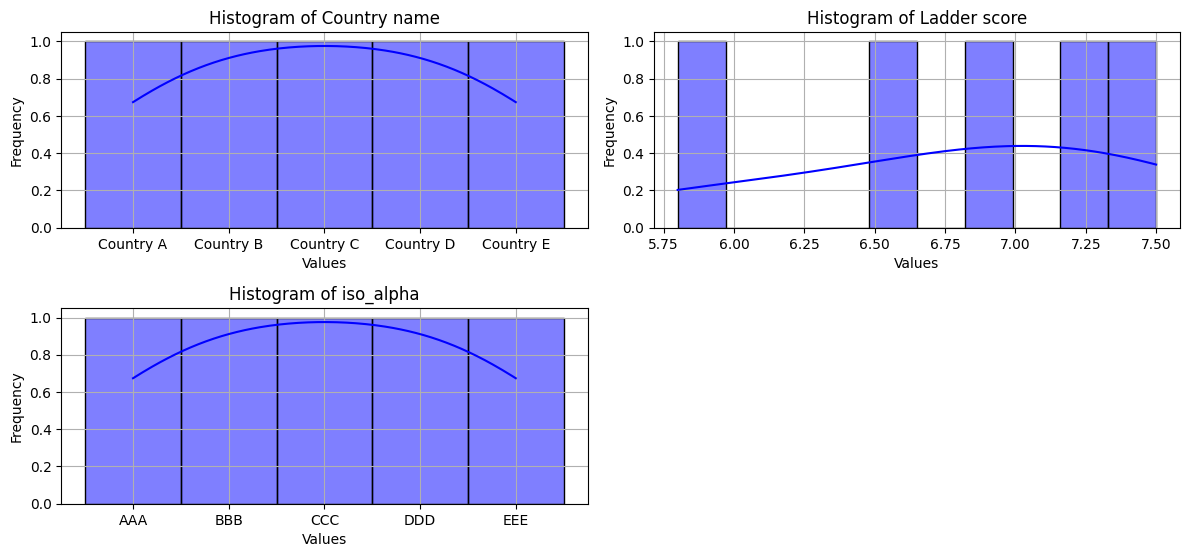

In [163]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i + 1)  # Adjust subplot layout as per your number of features
    sns.histplot(data[column], kde=True, bins=10, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

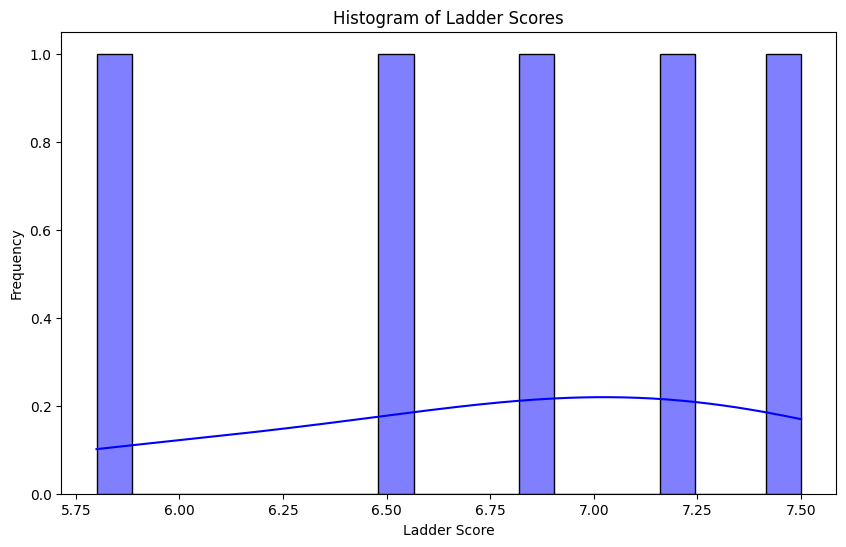

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Ladder score'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Ladder Scores')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.show()

In [169]:
ladder_score_stats = data['Ladder score'].describe()
ladder_score_stats

count    5.00000
mean     6.78000
std      0.66106
min      5.80000
25%      6.50000
50%      6.90000
75%      7.20000
max      7.50000
Name: Ladder score, dtype: float64

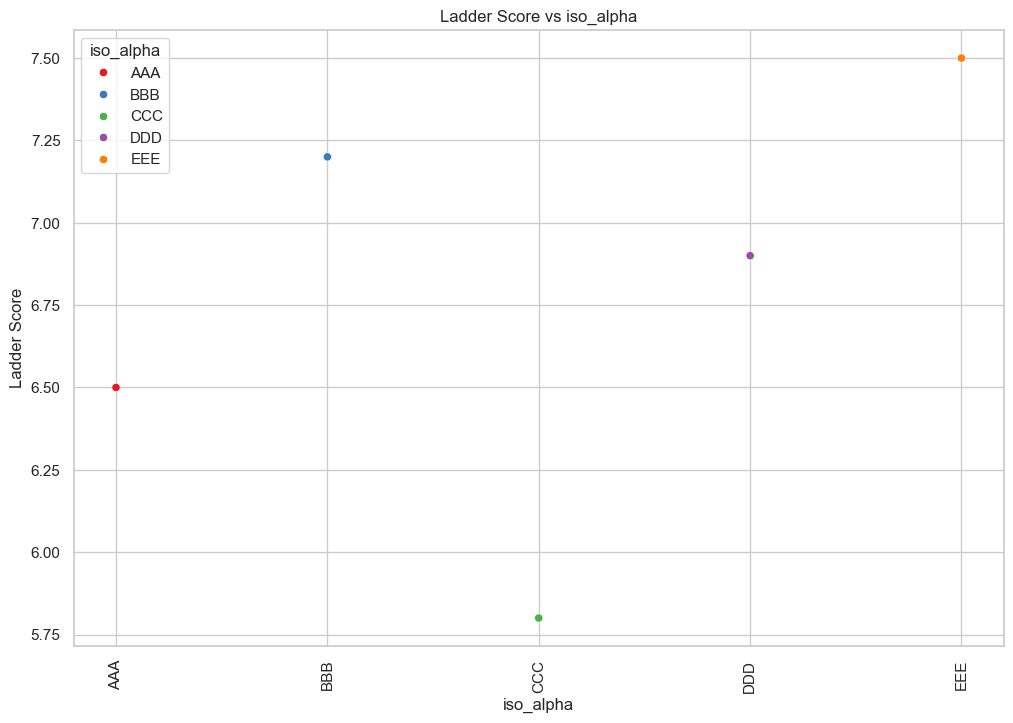

In [174]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='iso_alpha', y='Ladder score', data=data, hue='iso_alpha', palette='Set1')
plt.title('Ladder Score vs iso_alpha')
plt.xlabel('iso_alpha')
plt.ylabel('Ladder Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.legend(title='iso_alpha', loc='upper left')
plt.show()

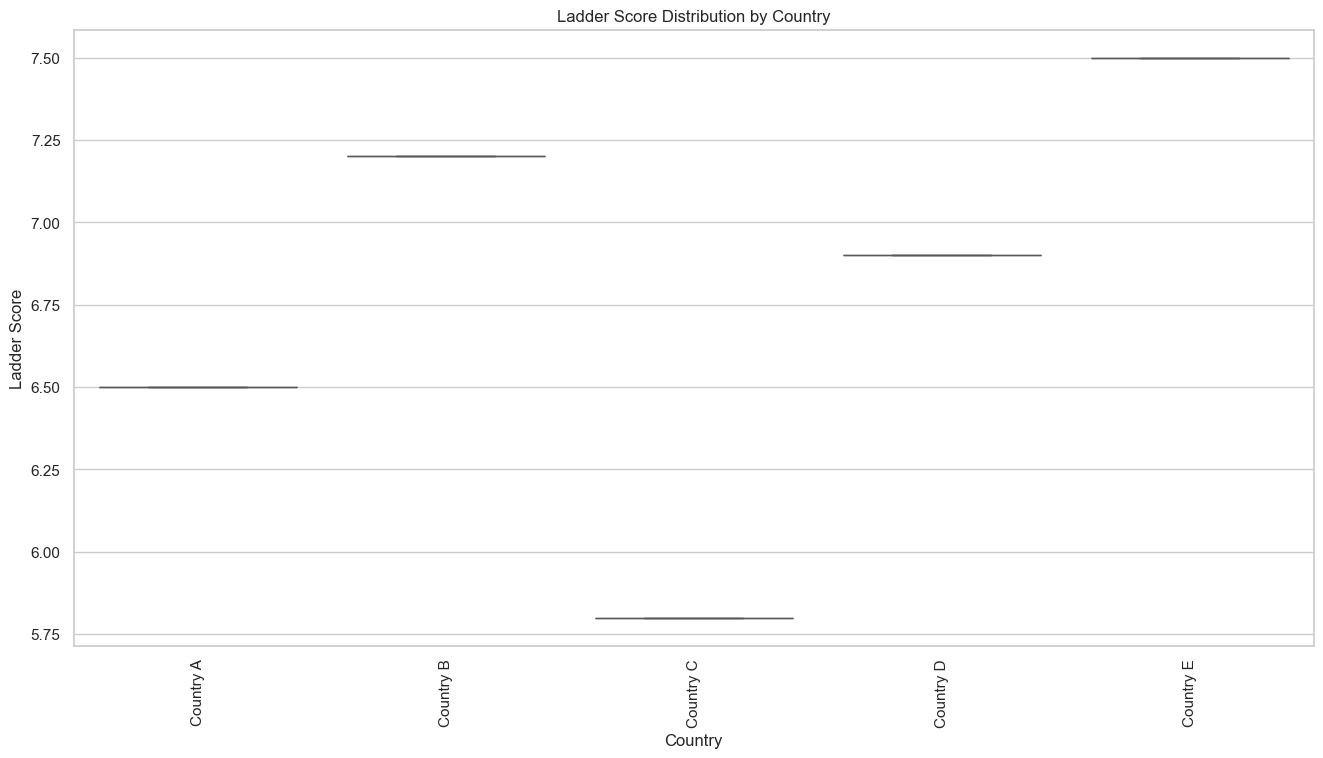

In [175]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Country name', y='Ladder score', data=data, palette='Set2')
plt.title('Ladder Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [187]:
numerical_cols = ['Ladder score'] 
numeric_cols

['Score', 'GDP_Per_Capita']

In [188]:
numerical_data = data[numerical_cols]
numerical_data

,Ladder score
0,6.5
1,7.2
2,5.8
3,6.9
4,7.5


In [189]:
correlation = numerical_data.corr()
correlation

,Ladder score
Ladder score,1.0


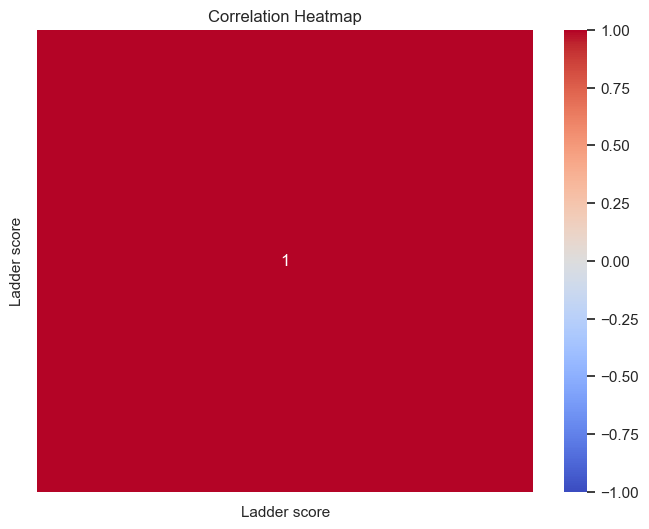

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [191]:
cross_tabulation = pd.crosstab(data['Country name'], data['iso_alpha'])
cross_tabulation

iso_alpha,AAA,BBB,CCC,DDD,EEE
Country name,,,,,
Country A,1,0,0,0,0
Country B,0,1,0,0,0
Country C,0,0,1,0,0
Country D,0,0,0,1,0
Country E,0,0,0,0,1


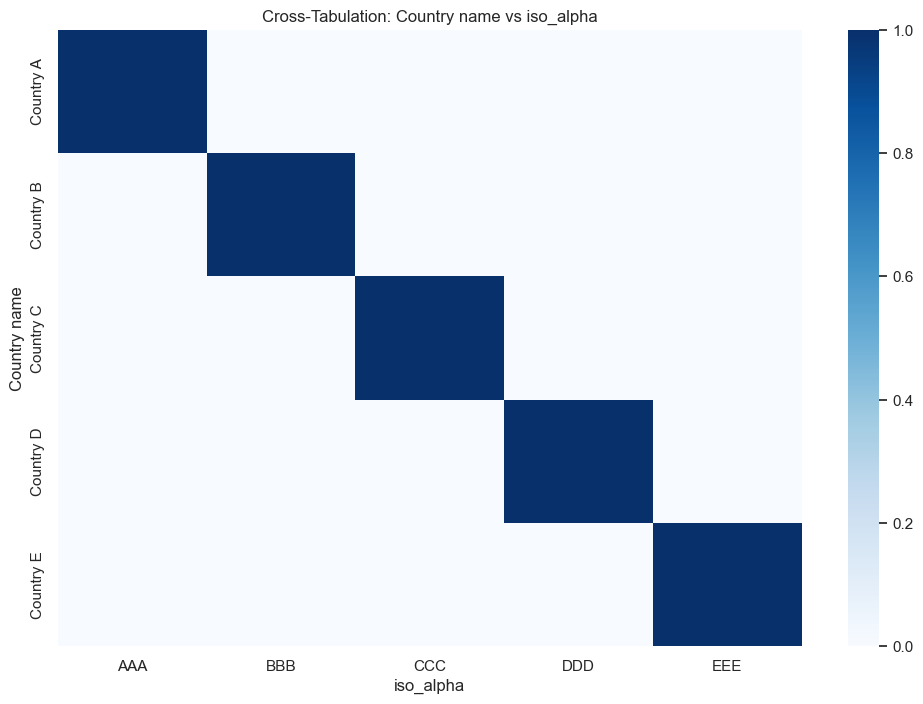

In [192]:
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tabulation, cmap='Blues', cbar=True)
plt.title('Cross-Tabulation: Country name vs iso_alpha')
plt.xlabel('iso_alpha')
plt.ylabel('Country name')
plt.show()

In [198]:
data.head()

,Country name,Ladder score,iso_alpha
0,Country A,6.5,AAA
1,Country B,7.2,BBB
2,Country C,5.8,CCC
3,Country D,6.9,DDD
4,Country E,7.5,EEE


In [200]:
data['Ladder score'].describe()

count    5.00000
mean     6.78000
std      0.66106
min      5.80000
25%      6.50000
50%      6.90000
75%      7.20000
max      7.50000
Name: Ladder score, dtype: float64

In [194]:
numeric_cols = ['Ladder score', 'GDP_Per_Capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']

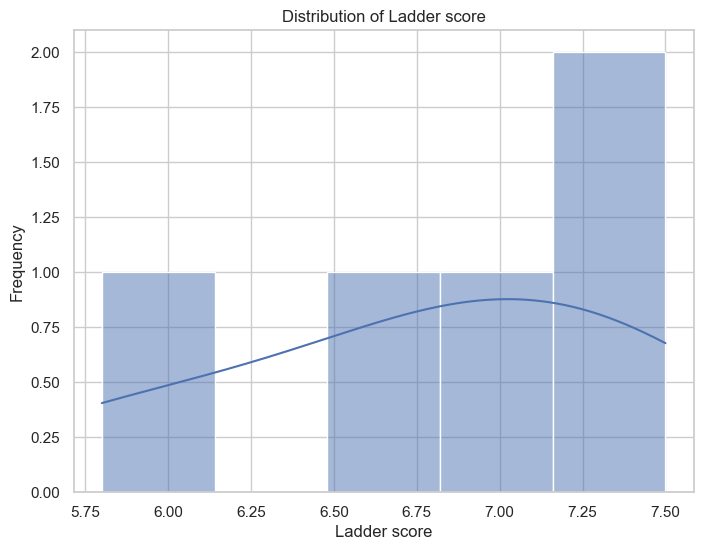

In [202]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Ladder score'], bins=5, kde=True)
plt.title('Distribution of Ladder score')
plt.xlabel('Ladder score')
plt.ylabel('Frequency')
plt.show()

In [204]:
cross_tab = pd.crosstab(data['iso_alpha'], columns='Count')
print("Cross-tabulation of iso_alpha and Ladder score:")
cross_tab


Cross-tabulation of iso_alpha and Ladder score:


col_0,Count
iso_alpha,
AAA,1
BBB,1
CCC,1
DDD,1
EEE,1


In [205]:
print("same data")
data

same data


,Country name,Ladder score,iso_alpha
0,Country A,6.5,AAA
1,Country B,7.2,BBB
2,Country C,5.8,CCC
3,Country D,6.9,DDD
4,Country E,7.5,EEE


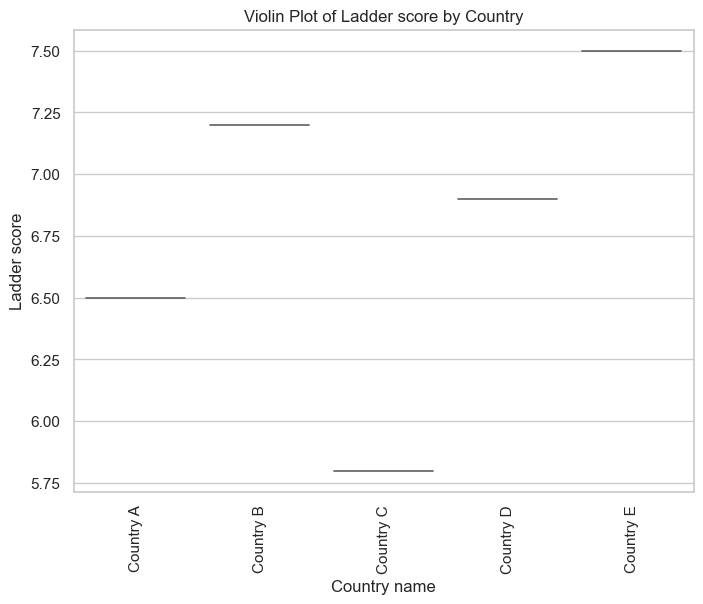

In [206]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country name', y='Ladder score', data=data, palette='Set3')
plt.title('Violin Plot of Ladder score by Country')
plt.xticks(rotation=90)
plt.show()


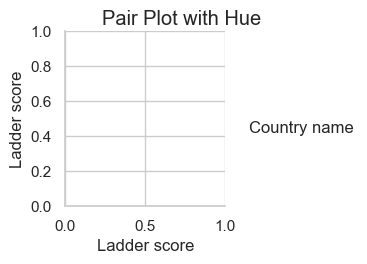

In [210]:
sns.pairplot(data=data, hue='Country name', palette='Set1')
plt.suptitle('Pair Plot with Hue', y=1.02)
plt.show()


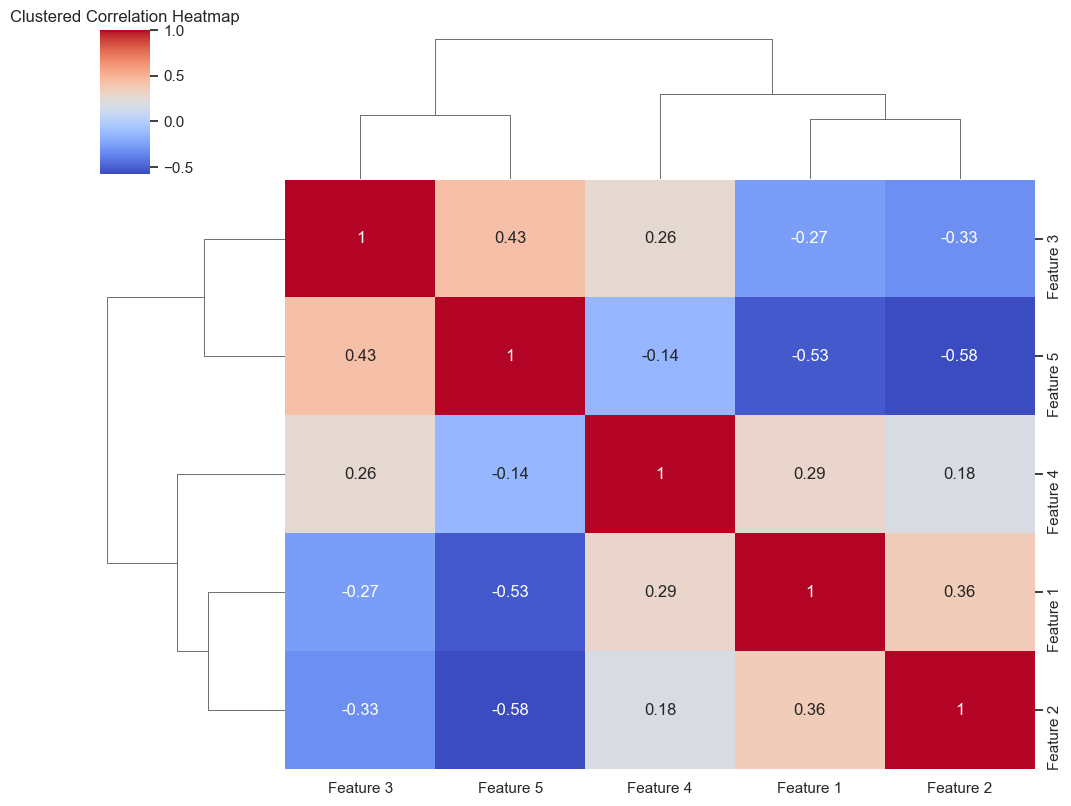

In [208]:
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, figsize=(10, 8))
plt.title('Clustered Correlation Heatmap')
plt.show()


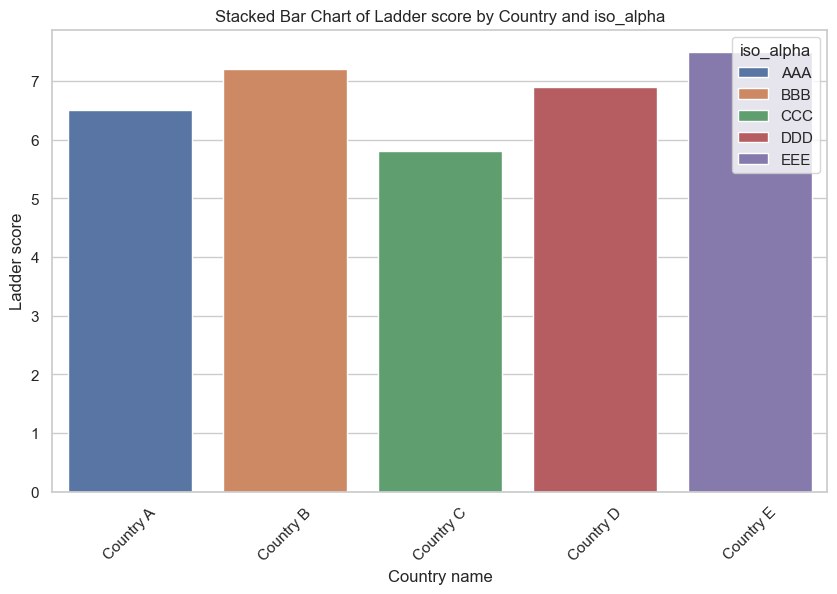

In [209]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Ladder score', hue='iso_alpha', data=data)
plt.title('Stacked Bar Chart of Ladder score by Country and iso_alpha')
plt.xticks(rotation=45)
plt.legend(title='iso_alpha', loc='upper right')
plt.show()


In [219]:
summary_stats = data['Ladder score'].describe()
summary_stats


count    5.00000
mean     6.78000
std      0.66106
min      5.80000
25%      6.50000
50%      6.90000
75%      7.20000
max      7.50000
Name: Ladder score, dtype: float64

In [220]:
iso_alpha_counts = data['iso_alpha'].value_counts()
iso_alpha_counts


iso_alpha
AAA    1
BBB    1
CCC    1
DDD    1
EEE    1
Name: count, dtype: int64

In [227]:
data = pd.DataFrame({
    'Country name': ['Country A', 'Country B', 'Country C'],
    'Ladder score': [6.5, 7.2, 5.8],
    'iso_alpha': ['AAA', 'BBB', 'CCC']
})

In [228]:
numeric_cols = ['Score', 'GDP_Per_Capita']

In [229]:
for col in numeric_cols:
    if col not in data.columns:
        print(f"Column '{col}' not found in data.")

# Create a new feature 'Combined Score'
if all(col in data.columns for col in numeric_cols):
    data['Combined Score'] = (data['Score'] + data['GDP_Per_Capita']) / 2
    print(data)
else:
    print("One or more specified columns not found in the data.")

Column 'Score' not found in data.
Column 'GDP_Per_Capita' not found in data.
One or more specified columns not found in the data.


In [230]:
data

,Country name,Ladder score,iso_alpha
0,Country A,6.5,AAA
1,Country B,7.2,BBB
2,Country C,5.8,CCC


In [232]:
data['Average Score'] = data['Ladder score'] + data['iso_alpha'].str.len()

In [233]:
data

,Country name,Ladder score,iso_alpha,Average Score
0,Country A,6.5,AAA,9.5
1,Country B,7.2,BBB,10.2
2,Country C,5.8,CCC,8.8


In [241]:

summary_stats = data.describe()
summary_stats


,Ladder score,Average Score,Combined Score
count,3.00,3.00,3.00
mean,6.50,9.50,9.50
std,0.70,0.70,0.70
min,5.80,8.80,8.80
25%,6.15,9.15,9.15
50%,6.50,9.50,9.50
75%,6.85,9.85,9.85
max,7.20,10.20,10.20


In [245]:
data.columns

Index(['Country name', 'Ladder score', 'iso_alpha', 'Average Score',
       'Combined Score'],
      dtype='object')

In [246]:
grouped_data = data.groupby('Country name').agg({
    'Ladder score': 'mean',
    'Average Score': 'sum',
    'Combined Score': 'mean'
}).reset_index()

In [247]:
grouped_data

,Country name,Ladder score,Average Score,Combined Score
0,Country A,6.5,9.5,9.5
1,Country B,7.2,10.2,10.2
2,Country C,5.8,8.8,8.8


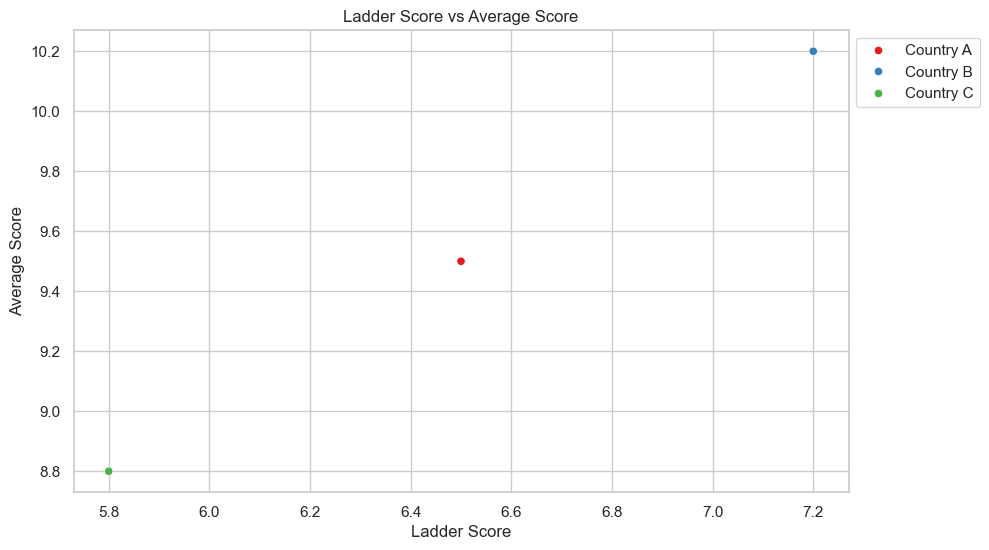

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ladder score', y='Average Score', data=grouped_data, hue='Country name', palette='Set1')
plt.title('Ladder Score vs Average Score')
plt.xlabel('Ladder Score')
plt.ylabel('Average Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [249]:
correlation = grouped_data[['Ladder score', 'Average Score', 'Combined Score']].corr()
print(correlation)


                Ladder score  Average Score  Combined Score
Ladder score             1.0            1.0             1.0
Average Score            1.0            1.0             1.0
Combined Score           1.0            1.0             1.0


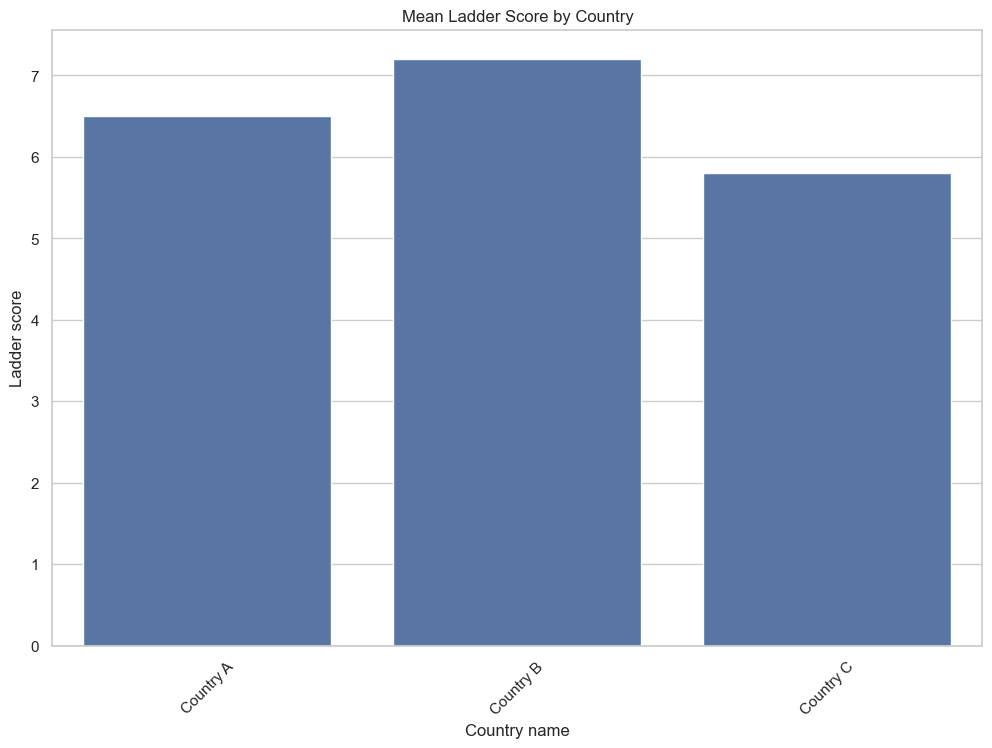

In [250]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country name', y='Ladder score', data=grouped_data)
plt.xticks(rotation=45)
plt.title('Mean Ladder Score by Country')
plt.show()


In [253]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Country Analysis Dashboard'),
    
    dcc.Graph(
        id='scatterplot',
        figure=px.scatter(grouped_data, x='Ladder score', y='Average Score', color='Country name', 
                          title='Ladder Score vs Average Score by Country')
    ),
    
    dcc.Graph(
        id='barplot',
        figure=px.bar(grouped_data, x='Country name', y='Ladder score', 
                      title='Mean Ladder Score by Country', labels={'Country name': 'Country'})
    ),
])
if __name__ == '__main__':
    app.run_server(debug=True)


In [255]:
import pandas as pd
from scipy import stats


In [256]:
t_stat, p_value = stats.ttest_ind(data['Ladder score'], data['Average Score'])

In [257]:
alpha = 0.05 

if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between Ladder score and Average Score.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between Ladder score and Average Score.")

Reject null hypothesis: There is a significant difference between Ladder score and Average Score.


In [258]:
means = data[['Ladder score', 'Average Score']].mean()
std_devs = data[['Ladder score', 'Average Score']].std()


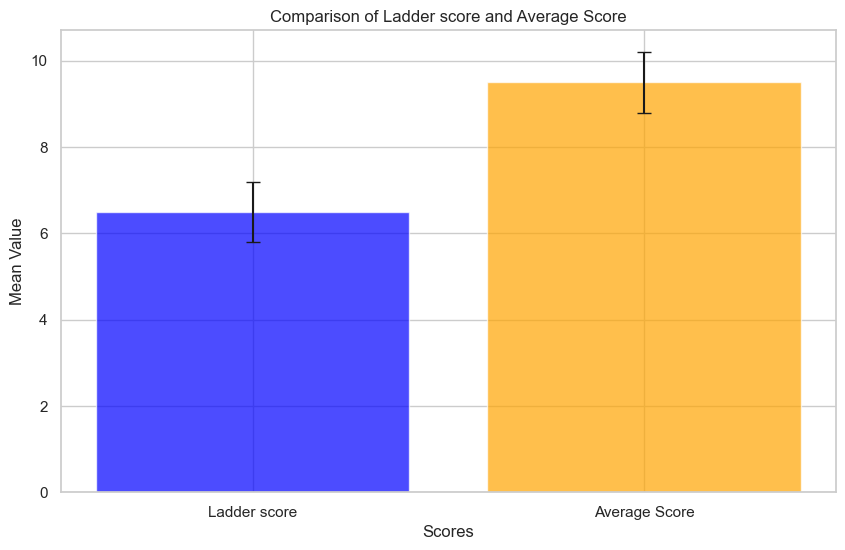

In [259]:
plt.figure(figsize=(10, 6))
plt.bar(means.index, means, yerr=std_devs, capsize=5, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Scores')
plt.ylabel('Mean Value')
plt.title('Comparison of Ladder score and Average Score')
plt.show()

In [260]:
data['Average Score'] = data['Ladder score'] + data['iso_alpha'].str.len()
data['Combined Score'] = data['Ladder score'] + data['iso_alpha'].str.len()

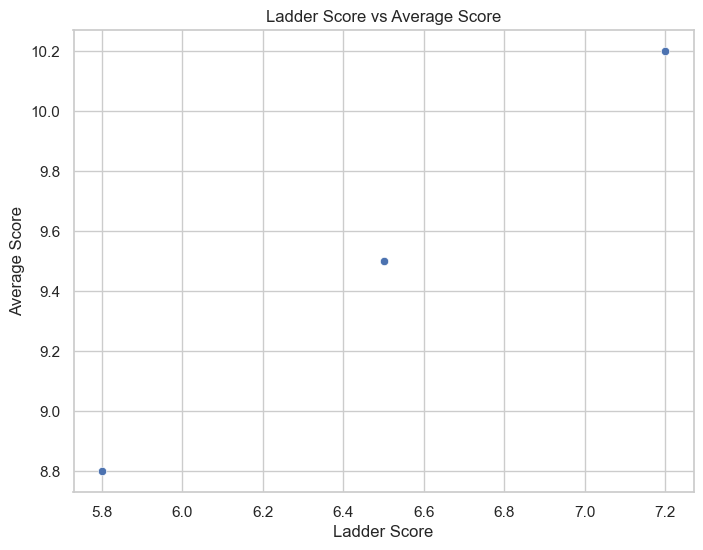

In [261]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ladder score', y='Average Score', data=data)
plt.title('Ladder Score vs Average Score')
plt.xlabel('Ladder Score')
plt.ylabel('Average Score')
plt.show()

<Figure size 1000x600 with 0 Axes>

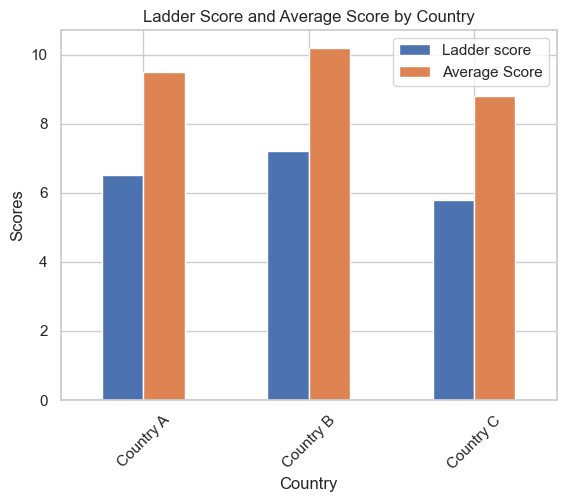

In [262]:
plt.figure(figsize=(10, 6))
data[['Country name', 'Ladder score', 'Average Score']].set_index('Country name').plot(kind='bar')
plt.title('Ladder Score and Average Score by Country')
plt.xlabel('Country')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

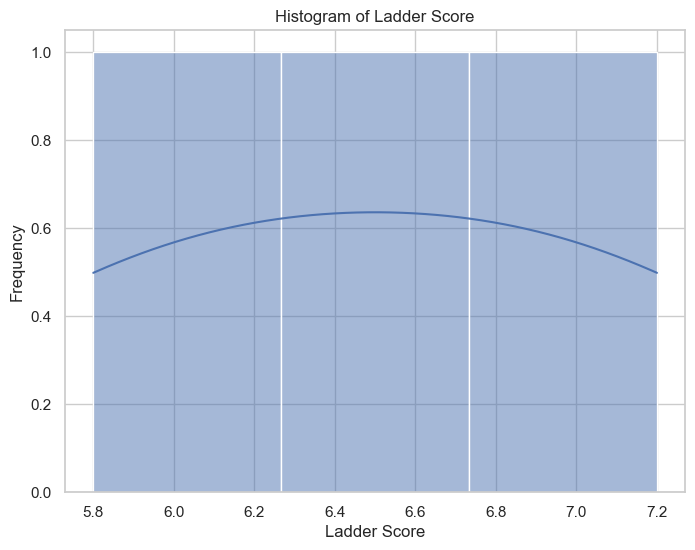

In [263]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Ladder score'], kde=True)
plt.title('Histogram of Ladder Score')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.show()

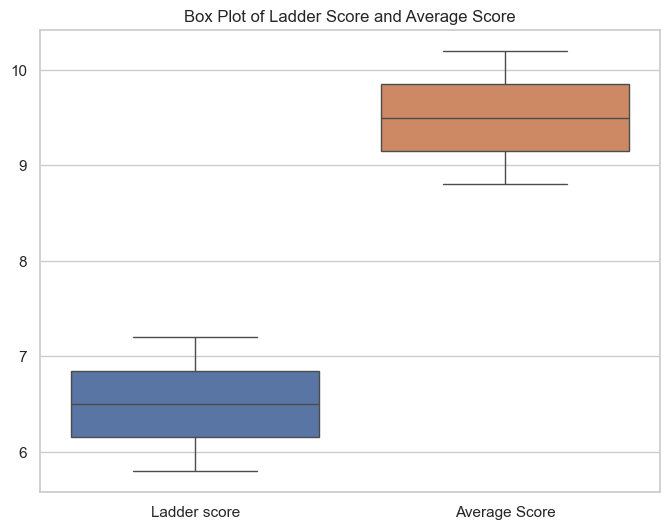

In [264]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['Ladder score', 'Average Score']])
plt.title('Box Plot of Ladder Score and Average Score')
plt.show()

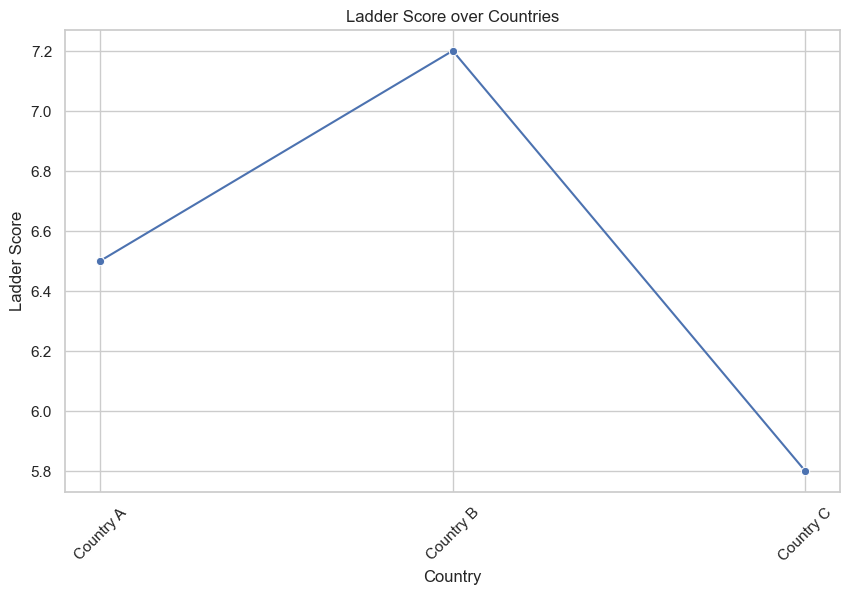

In [265]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Country name', y='Ladder score', marker='o')
plt.title('Ladder Score over Countries')
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.xticks(rotation=45)
plt.show()

In [266]:
summary_table = data.describe()
summary_table

,Ladder score,Average Score,Combined Score
count,3.00,3.00,3.00
mean,6.50,9.50,9.50
std,0.70,0.70,0.70
min,5.80,8.80,8.80
25%,6.15,9.15,9.15
50%,6.50,9.50,9.50
75%,6.85,9.85,9.85
max,7.20,10.20,10.20


In [267]:
anova_result = stats.f_oneway(data['Ladder score'], data['Average Score'])
anova_result

F_onewayResult(statistic=27.551020408163303, pvalue=0.006301891649111839)

C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_15004\1603498739.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



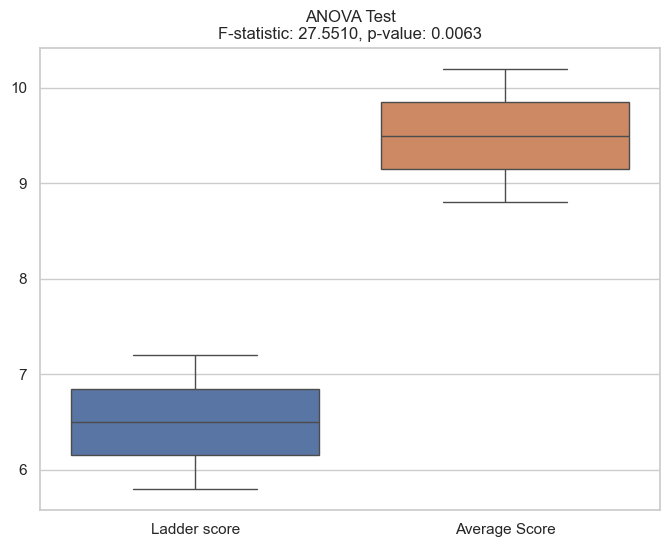

In [268]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=[data['Ladder score'], data['Average Score']], ax=ax)
ax.set_xticklabels(['Ladder score', 'Average Score'])
ax.set_title(f'ANOVA Test\nF-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}')
plt.show()